In [55]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [56]:
class KNN_Clasifier(object):

    def __init__(self, k = 3):
        self.k = k
   
    def distanciaEuclideana(self,obj1, obj2):
        sum = 0
        for i in range(0,len(obj1)):
            sum += (obj1[i] - obj2[i])**2
        res = math.sqrt(sum)
        return res

    def create_euclidean_distance_list(self, characteristics: list, center: list) -> list:
        distancias = []
        for element in characteristics:
            distancias.append(self.distanciaEuclideana(center, element))
        return distancias

    def most_frequent(self,List):
        counter = 0
        num = List[0]
        
        for i in List:
            curr_frequency = List.count(i)
            if(curr_frequency> counter):
                counter = curr_frequency
                num = i
    
        return num

    def simple_predict(self, X_std: list, y: list, new_object: list):
        distances = self.create_euclidean_distance_list(characteristics=X_std, center=new_object[0])
        distances_origin = distances.copy()
        distances.sort()

        winners = []
        for i in np.arange(self.k):
            winners.append(y[distances_origin.index(distances[i])])

        return self.most_frequent(winners)
    
    def predict(self, X_train: list, y_train: list, X_test: list):
        y_pred = []
        for element in X_test:
            y_pred.append(self.simple_predict(X_std=X_train, y=y_train, new_object=[element]))
        return y_pred


In [57]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


new_object = [5.2, 3.2, 2.2, 1.2]
new_object = scaler.transform([new_object])
print(new_object)

[[-7.79513300e-01  3.28414053e-01 -8.85527111e-01  8.77547895e-04]]


In [58]:
knn = KNN_Clasifier(k=3)
result = knn.simple_predict(X_std=X_train, y=y_train, new_object=new_object)
print(f'La clase predecida es {iris.target_names[result]}')

La clase predecida es setosa


In [59]:
y_pred = knn.predict(X_train=X_train, y_train=y_train, X_test=X_test)

<Axes: >

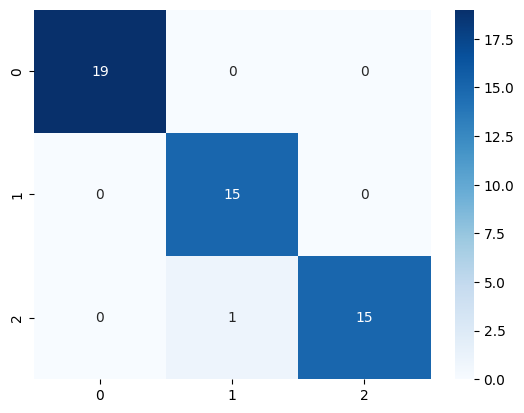

In [60]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap="Blues")

In [61]:

print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

